# **Libraries:**

---

In [ ]:
import random
import numpy as np
import pandas as pd
from tabulate import tabulate
import matplotlib.pyplot as plt
import time

# **Defining addition functions**

---

In [ ]:
base = 10
count_add = 0

def add_mac(a,b):
  if 0 <= (a and b) < base:
    global count_add
    count_add += 1

    c = a+b
    return (c%base,c//base)

  else:
    raise Exception(f"Inputs of add_mac() should be between 0 and (Base-1)={base-1}")



def add1(alpha, beta, c, is_first_call=True):
    global count_add
    if is_first_call:
        count_add = 0

    r, s, t = [], [], []
    r = add_mac(alpha[0], beta[0])
    s = add_mac(r[0], c)
    t = add_mac(r[1], s[1])
    if len(alpha) == 1:
        return [s[0], t[0]]
    return [s[0]] + add1(alpha[1:], beta[1:], t[0], is_first_call=False)




def add(alpha,beta):
    global count_add
    count_add = 0
    la,lb = len(alpha),len(beta)
    l = max(la,lb)
    alpha = alpha + (l-la)*[0]
    beta = beta + (l-lb)*[0]
    return add1(alpha,beta,0)

# **Defining simple (Grade-school) multiplication functions:**

---

In [ ]:
base = 10
count_mul = 0

def mul_mac(a,b):
  if 0 <= (a and b) < base:
    global count_mul
    count_mul += 1

    c = a*b
    return (c%base,c//base)

  else:
    raise Exception(f"Inputs of mul_mac() should be between 0 and (Base-1)={base-1}")



def mul1(a, beta, c, is_first_call=True):
    global count_mul, count_add
    if is_first_call:
        count_mul = 0
        count_add = 0

    r = mul_mac(a, beta[0])
    s = add_mac(r[0], c)
    t = add_mac(r[1], s[1])
    if len(beta) == 1:
        return [s[0], t[0]]
    else:
        return [s[0]] + mul1(a, beta[1:], t[0], is_first_call=False)




def mul(alpha, beta, is_first_call=True):
    global count_mul, count_add
    if is_first_call:
        count_mul = 0
        count_add = 0

    r = mul1(alpha[0], beta, 0, is_first_call=False)
    if len(alpha) == 1:
        return r
    s = [0] + mul(alpha[1:], beta, is_first_call=False)
    return add(r, s)

In [ ]:
a = 9
beta = [5,2,8, 7, 5, 9]

print(mul1(a,beta,c=0))
print(count_mul)

[5, 2, 4, 0, 2, 6, 8]
6


In [ ]:
alpha=[9,7,2,8,3]
beta=[8,7,3,4]

print(mul(alpha,beta))
print(count_mul)
print(count_add)

[2, 6, 4, 5, 8, 5, 7, 6, 1, 0, 0, 0, 0]
20
36


# **Substraction:**

---

In [ ]:
def sub(a, b):
    global count_add
    count_add = 0

    la, lb = len(a), len(b)
    n = max(la, lb)

    a = a + (n - la) * [0]
    b = b + (n - lb) * [0]

    z = [(base - 1) - ai for ai in a]

    r = add1(z, b, 0)

    if r[-1] == 0:
        s = [(base - 1) - ri for ri in r[:-1]]
        while len(s) > 1 and s[-1] == 0:
            s.pop()
        return s, +1
    else:
        r_without_carry = r[:-1]
        s = add(r_without_carry, [1] + [0] * (n - 1))
        while len(s) > 1 and s[-1] == 0:
            s.pop()
        return s, -1

In [ ]:
a1 = [9,4,8,5,3]
b1 = [4,8,6]

print(sub(a1,b1))
print(count_add)

([5, 6, 1, 5, 3], 1)
15


Which is true as $ \rightarrow 35849-684=+35165$.

The time complexity of this substraction algorithm is $O(n)$.

# **Karatsuba multiplication:**

---

Karatsuba multiplication is a divide-and-conquer algorithm that significantly improves on the grade-school method for multiplying two $n$-digit numbers. Instead of performing $n^2$ multiplications, as in the grade-school approach with $O(n^2)$ time complexity, Karatsuba reduces the problem into three smaller multiplications of size $\frac{n}{2}$.

In [ ]:
def kmul1(a, b):
    l = len(a)

    if l == 1:
        return list(mul_mac(a[0], b[0]))

    mid = l // 2
    c, d = a[:mid], a[mid:]
    e, f = b[:mid], b[mid:]

    g, sign_g = sub(c, d)
    h, sign_h = sub(f, e)

    max_len = max(len(g), len(h))
    g = g + [0] * (max_len - len(g))
    h = h + [0] * (max_len - len(h))

    sign = sign_g * sign_h

    r = kmul1(c, e)
    s = kmul1(d, f)
    t = kmul1(g, h)

    u = add(r, s)
    if sign == +1:
        v = add(u, t)
    else:
        v, sign_v = sub(u, t)

    s_prime = [0] * l + s
    v_prime = [0] * (l // 2) + v

    w = add(r, s_prime)
    x = add(w, v_prime)

    x = [0] * (2 * l - len(x)) + x
    return x


def kmul(a, b):
    k = max(len(a), len(b))

    n = 1
    while 2 ** n < k:
        n += 1
    padded_length = 2 ** n

    a = a + [0] * (padded_length - len(a))
    b = b + [0] * (padded_length - len(b))

    return kmul1(a, b)

In [ ]:
a = [7, 6, 5, 8, 9, 2, 4]
b = [9, 8, 8, 4, 3]

print(kmul(a, b))

[3, 6, 0, 4, 0, 7, 2, 7, 9, 9, 4, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]


In [ ]:
4298567*34889

149972704063

Which is true as we can see in the cell above that: $4298567 \times 34889=149972704063$.

### **`mul_mac()` calls and time vs the size of digits:**

In [ ]:
def generate_data(n):
    data = []
    for i in range(1, n + 1):
        alpha = [random.randint(0, base - 1) for j in range(i)]
        beta = [random.randint(0, base - 1) for j in range(i)]
        data.append((alpha, beta))
    return data

data = generate_data(50)
print(data)

[([3], [0]), ([1, 1], [6, 1]), ([6, 4, 5], [3, 5, 1]), ([4, 1, 3, 8], [0, 3, 4, 5]), ([4, 2, 5, 3, 9], [0, 1, 5, 8, 1]), ([5, 8, 6, 2, 8, 5], [6, 2, 2, 4, 2, 1]), ([7, 2, 2, 6, 8, 4, 7], [2, 4, 1, 4, 8, 3, 6]), ([0, 3, 9, 9, 0, 9, 9, 3], [6, 5, 3, 3, 8, 7, 4, 5]), ([0, 5, 5, 9, 1, 4, 7, 5, 1], [6, 7, 0, 7, 2, 2, 3, 8, 2]), ([4, 9, 0, 2, 3, 0, 5, 8, 4, 0], [1, 4, 7, 7, 8, 9, 9, 4, 8, 4]), ([8, 2, 0, 4, 8, 7, 8, 5, 0, 4, 0], [2, 7, 6, 1, 8, 0, 8, 7, 3, 2, 5]), ([5, 4, 1, 3, 4, 8, 4, 0, 1, 7, 3, 7], [7, 5, 2, 3, 2, 1, 3, 1, 1, 7, 3, 3]), ([5, 4, 7, 3, 6, 8, 4, 2, 9, 9, 2, 3, 4], [4, 7, 8, 9, 4, 7, 0, 5, 4, 8, 6, 5, 5]), ([9, 0, 4, 6, 7, 8, 3, 0, 2, 8, 2, 6, 3, 0], [3, 1, 4, 6, 2, 8, 2, 1, 0, 0, 0, 0, 6, 9]), ([2, 0, 4, 2, 3, 6, 1, 7, 8, 5, 4, 8, 5, 6, 6], [8, 0, 8, 4, 8, 2, 3, 4, 5, 6, 7, 9, 0, 2, 7]), ([4, 2, 9, 0, 2, 7, 8, 6, 0, 2, 5, 0, 7, 5, 2, 0], [7, 9, 5, 9, 0, 6, 0, 4, 5, 5, 6, 5, 8, 4, 7, 6]), ([5, 3, 8, 1, 8, 9, 4, 6, 8, 5, 4, 1, 0, 1, 3, 3, 1], [1, 9, 8, 7, 8, 6, 2, 8, 0, 1, 5,

In [ ]:
def kmul_calls_time(data):
    results = []
    for alpha, beta in data:
        global count_mul
        count_mul = 0

        start_time = time.time()
        kmul(alpha, beta)
        end_time = time.time()

        elapsed_time = end_time - start_time
        results.append({"Length": len(alpha), "mul_mac() calls": count_mul, "Time": elapsed_time})
    return pd.DataFrame(results)



results_kmul = kmul_calls_time(data)
print(tabulate(results_kmul, headers="keys", tablefmt="fancy_grid"))

╒════╤══════════╤═══════════════════╤═════════════╕
│    │   Length │   mul_mac() calls │        Time │
╞════╪══════════╪═══════════════════╪═════════════╡
│  0 │        1 │                 3 │ 0.000116825 │
├────┼──────────┼───────────────────┼─────────────┤
│  1 │        2 │                 3 │ 9.46522e-05 │
├────┼──────────┼───────────────────┼─────────────┤
│  2 │        3 │                 9 │ 0.000432491 │
├────┼──────────┼───────────────────┼─────────────┤
│  3 │        4 │                 9 │ 0.000668526 │
├────┼──────────┼───────────────────┼─────────────┤
│  4 │        5 │                25 │ 0.00140214  │
├────┼──────────┼───────────────────┼─────────────┤
│  5 │        6 │                27 │ 0.00134301  │
├────┼──────────┼───────────────────┼─────────────┤
│  6 │        7 │                27 │ 0.00137329  │
├────┼──────────┼───────────────────┼─────────────┤
│  7 │        8 │                27 │ 0.00179696  │
├────┼──────────┼───────────────────┼─────────────┤
│  8 │      

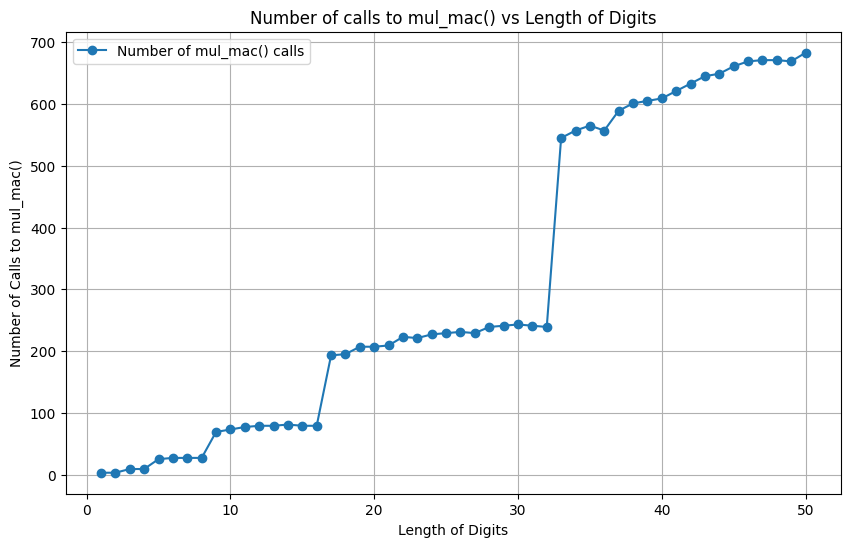

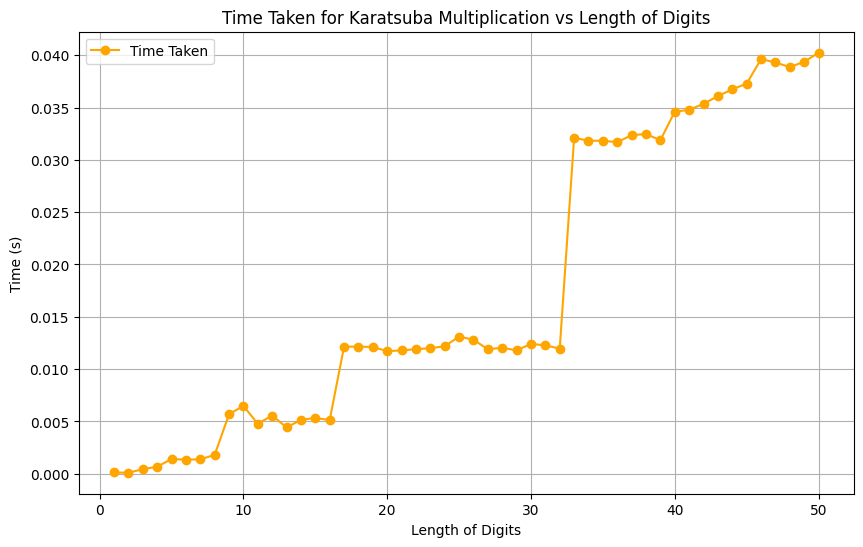

In [ ]:
# Plotting mul_mac() calls vs Length
plt.figure(figsize=(10, 6))
plt.plot(results_kmul["Length"], results_kmul["mul_mac() calls"], marker="o", label="Number of mul_mac() calls")
plt.title("Number of calls to mul_mac() vs Length of Digits")
plt.xlabel("Length of Digits")
plt.ylabel("Number of Calls to mul_mac()")
plt.grid()
plt.legend()
plt.show()

# Plotting Time vs Length
plt.figure(figsize=(10, 6))
plt.plot(results_kmul["Length"], results_kmul["Time"], marker="o", color="orange", label="Time Taken")
plt.title("Time Taken for Karatsuba Multiplication vs Length of Digits")
plt.xlabel("Length of Digits")
plt.ylabel("Time (s)")
plt.grid()
plt.legend()
plt.show()

### **Actual vs Theoretical complexity**

Its time complexity is governed by the recurrence relation:
$$T(n) = 3T\left(\frac{n}{2}\right) + O(n)$$
Solving this recurrence gives a complexity of:
$$T(n) = O(n^{\log_2 3}) \approx O(n^{1.585})$$
making it asymptotically faster than $O(n^2)$. The speedup is achieved by trading a small increase in additions and subtractions, which have linear complexity $O(n)$, for a reduction in the number of expensive multiplications.
For small input sizes, the overhead of Karatsuba (e.g., recursive calls and additional additions/subtractions) may make it less efficient than the grade-school algorithm. However, for large inputs, especially in applications like cryptography and arbitrary-precision arithmetic, Karatsuba's efficiency scales better, making it a preferred choice for multiplying large integers.

In [ ]:
log23 = np.log2(3)
results_kmul["Theoretical mul_mac() calls"] = results_kmul["Length"].apply(lambda n: n ** log23)

print(tabulate(results_kmul, headers="keys", tablefmt="fancy_grid"))

╒════╤══════════╤═══════════════════╤═════════════╤═══════════════════════════════╕
│    │   Length │   mul_mac() calls │        Time │   Theoretical mul_mac() calls │
╞════╪══════════╪═══════════════════╪═════════════╪═══════════════════════════════╡
│  0 │        1 │                 3 │ 0.000116825 │                       1       │
├────┼──────────┼───────────────────┼─────────────┼───────────────────────────────┤
│  1 │        2 │                 3 │ 9.46522e-05 │                       3       │
├────┼──────────┼───────────────────┼─────────────┼───────────────────────────────┤
│  2 │        3 │                 9 │ 0.000432491 │                       5.70452 │
├────┼──────────┼───────────────────┼─────────────┼───────────────────────────────┤
│  3 │        4 │                 9 │ 0.000668526 │                       9       │
├────┼──────────┼───────────────────┼─────────────┼───────────────────────────────┤
│  4 │        5 │                25 │ 0.00140214  │                      12.

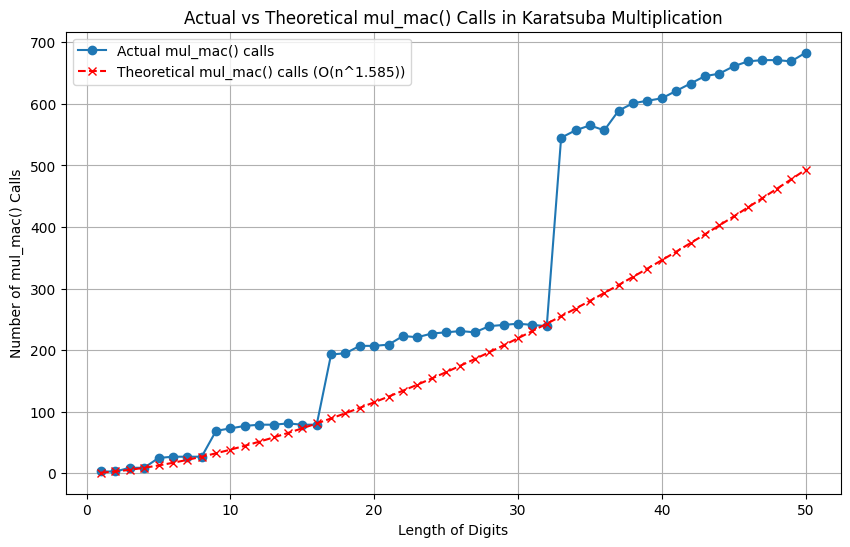

In [ ]:
# Plotting actual vs theoretical mul_mac() calls
plt.figure(figsize=(10, 6))
plt.plot(results_kmul["Length"], results_kmul["mul_mac() calls"], marker="o", label="Actual mul_mac() calls")
plt.plot(results_kmul["Length"], results_kmul["Theoretical mul_mac() calls"], marker="x", linestyle="--", label="Theoretical mul_mac() calls (O(n^1.585))", color="red")
plt.title("Actual vs Theoretical mul_mac() Calls in Karatsuba Multiplication")
plt.xlabel("Length of Digits")
plt.ylabel("Number of mul_mac() Calls")
plt.grid()
plt.legend()
plt.show()

The step-like pattern observed in the actual `mul_mac()` calls is due to input padding in Karatsuba multiplication. Karatsuba’s recursive algorithm splits numbers into halves, and for optimal performance, the input size $n$ should ideally be a power of 2 to ensure even splits. When $n$ is not a power of 2, zero-padding increases the effective length to the next power of 2, which increases the recursive depth and leads to more `mul_mac()` calls than the theoretical $ O(n^{1.585}) $. At power-of-2 lengths, the actual `mul_mac()` calls align closely with the theoretical values, resulting in the observed "coinciding points." This behavior aligns with Karatsuba’s recursive call structure, where the number of calls is proportional to $ 3^{\lceil \log_2(n) \rceil} $, and hence reflects the padded length rather than the original input size, as we can observe in above 2 plots.

In [ ]:
!jupyter nbconvert --to html /content/MTH407_Ass-2_MS21024.ipynb

[NbConvertApp] Converting notebook /content/MTH407_Ass-2_MS21024.ipynb to html
[NbConvertApp] WARNING | Alternative text is missing on 3 image(s).
[NbConvertApp] Writing 531485 bytes to /content/MTH407_Ass-2_MS21024.html
